In [1]:
file1 = open('20210507_1605_C088.txt', 'r')
Lines = file1.readlines()

file2 = open('20210507_1605_3078.txt', 'r')
Lines2 = file2.readlines()

In [2]:
import json
import numpy as np

DATA = []

for line in Lines:
    
    test_string = line
    
    res = json.loads(test_string)
    
    heatmap = np.asarray(res["data"])
    
    DATA.append(heatmap)
    
for line in Lines2:
    
    test_string = line
    
    res = json.loads(test_string)
    
    heatmap = np.asarray(res["data"])
    
    DATA.append(heatmap)

In [3]:
for i in range(10000):
    
    x = np.random.uniform(9,20,(32,32))
    
    DATA.append(x)

In [4]:
DATA = np.asarray(DATA)

In [5]:
Y = []

for i in range(10000):
    Y.append(1)
for i in range(10000):
    Y.append(0)
    
Y = np.asarray(Y)

In [7]:
DATA.shape

(20000, 32, 32)

In [8]:
Y.shape

(20000,)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DATA, Y, test_size=0.33, random_state=42)

In [10]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
X_train.shape

(13400, 32, 32, 1)

In [12]:
y_train.shape

(13400, 2)

In [13]:
def normalize(x):
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [14]:
X_train = normalize(X_train.astype('float32'))

In [15]:
X_test = normalize(X_test.astype('float32'))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense,Softmax
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from matplotlib import pyplot as plt

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (1, 1), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(32, (1, 1), activation='relu', kernel_initializer='he_uniform'))

    #model.add(Flatten())
    #model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(AveragePooling2D())
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    #model.add(AveragePooling2D())
    #model.add(Flatten())
    #model.add(Softmax())
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [17]:
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        4160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)          2

Epoch 1/10
335/335 [==============================] - 5s 10ms/step - loss: 0.1047 - accuracy: 0.9473 - val_loss: 1.5261e-05 - val_accuracy: 1.0000
Epoch 2/10
335/335 [==============================] - 3s 9ms/step - loss: 1.4372e-05 - accuracy: 1.0000 - val_loss: 1.1143e-05 - val_accuracy: 1.0000
Epoch 3/10
335/335 [==============================] - 3s 9ms/step - loss: 1.0755e-05 - accuracy: 1.0000 - val_loss: 8.8082e-06 - val_accuracy: 1.0000
Epoch 4/10
335/335 [==============================] - 3s 9ms/step - loss: 8.4354e-06 - accuracy: 1.0000 - val_loss: 7.2973e-06 - val_accuracy: 1.0000
Epoch 5/10
335/335 [==============================] - 3s 9ms/step - loss: 7.1579e-06 - accuracy: 1.0000 - val_loss: 6.2379e-06 - val_accuracy: 1.0000
Epoch 6/10
335/335 [==============================] - 3s 9ms/step - loss: 6.2408e-06 - accuracy: 1.0000 - val_loss: 5.4521e-06 - val_accuracy: 1.0000
Epoch 7/10
335/335 [==============================] - 3s 9ms/step - loss: 5.4293e-06 - accuracy: 1.0000

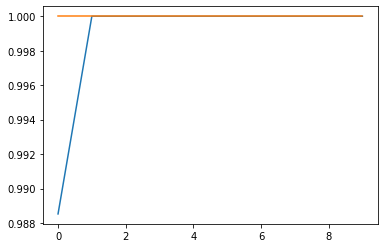

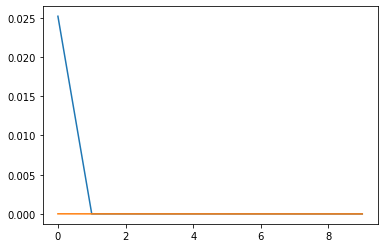

Test Accuracy:
207/207 - 1s - loss: 3.6786e-06 - accuracy: 1.0000


In [18]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

print("Test Accuracy:")
test_acc = model.evaluate(X_test, y_test, verbose=2)

In [19]:
model.pop()
model.pop()
model.pop()

In [20]:
model.layers

In [21]:
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(32, (1, 1), activation='relu', kernel_initializer='he_uniform'))

In [22]:
model.add(Flatten())
model.add(Dense(112, activation='linear'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        4160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)          2

In [ ]:
import os 

annot_list = os.listdir("annotations")[1:]

In [ ]:
annot_list

In [ ]:
for l in annot_list:
    file1 = open("annotations/" + l, 'r')
    Lines = file1.readlines()
    #print(Lines)
    with open("correct_annotations/" + l, 'a') as the_file:
        
        for line in Lines:
            x=""
            correct = line.split(" ")
            if correct[0]=="15":
                correct[0]="0"
            if correct[0]=="16":
                correct[0]="1"
            
            for i in correct:
                x = x + " " + i
            
            #print(correct)
            the_file.write(x)
    
            
        
        
    

In [3]:
def xywh2minmax(xy, wh):
    xy_min = xy - wh / 2
    xy_max = xy + wh / 2

    return xy_min, xy_max

In [1]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

In [5]:
import numpy as np
xywh2minmax(np.array([32*0.169714, 32*0.634909]), np.array([32*0.078857, 32*0.367378]))

(array([ 4.169136, 14.43904 ]), array([ 6.69256 , 26.195136]))

In [ ]:
t=np.random.rand(112)
k=np.resize(t,(4,4,7))

In [ ]:
k[0][0]

In [ ]:
def custom_loss(y_true, y_pred):
            
    # calculate loss, using y_pred
    
    
    
        
    return loss
  
model.compile(loss=custom_loss, optimizer='adam')